# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:'Times New Roman'; background-color:#00BFFF; overflow:hidden"><b>Import libraries and load data</b></div>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import plotly.express as px
from wordcloud import WordCloud
warnings.filterwarnings("ignore")



df = pd.read_csv(r"C:\Users\dell\Downloads\Global Earthquake Insights\earthquakes.csv")
print(df.head())
print(df.info())
print(df.isnull().sum())


           id  magnitude        type  \
0  us7000necw        4.8  earthquake   
1  tx2024shcj        5.1  earthquake   
2  ci40734823        3.7  earthquake   
3  tx2024scvz        3.9  earthquake   
4  us7000ndte        4.1  earthquake   

                                        title                 date  \
0         M 4.8 - 33 km WSW of Ackerly, Texas  2024-09-17T00:49:42   
1         M 5.1 - 34 km WSW of Ackerly, Texas  2024-09-17T00:49:42   
2                M 3.7 - 6 km N of Malibu, CA  2024-09-16T11:22:08   
3  M 3.9 - 58 km S of Whites City, New Mexico  2024-09-14T17:01:06   
4  M 4.1 - 60 km S of Whites City, New Mexico  2024-09-14T17:01:06   

            time        updated  \
0  1726534182289  1726583895255   
1  1726534182183  1726672002991   
2  1726485728190  1726637414586   
3  1726333266539  1726584426218   
4  1726333266382  1726334616179   

                                                 url  \
0  https://earthquake.usgs.gov/earthquakes/eventp...   
1  https://eart

In [2]:
with open('/kaggle/input/recent-earthquakes/earthquakes_column_descriptors.txt', 'r') as file:
    column_descriptors = file.read()
print(column_descriptors)


Column Descriptors:
id: Unique identifier for each earthquake event.
magnitude: The strength of the earthquake on the Richter scale.
type: Type of seismic event (earthquake, explosion, etc.).
title: Title of the earthquake event (place and magnitude).
date: Date when the earthquake occurred.
time: Time when the earthquake occurred.
updated: Last updated timestamp for the event.
url: Link to the earthquake event's details.
detailUrl: Additional details URL.
felt: Number of people who reported feeling the earthquake.
cdi: Community Determined Intensity, how strongly the event was felt.
mmi: Modified Mercalli Intensity, scale used to measure earthquake intensity.
alert: Alert level (green, yellow, orange, red).
status: Status of the event (reviewed, automatic).
tsunami: Tsunami risk flag (0 = no risk, 1 = risk).
sig: Significance of the earthquake, based on magnitude and impact.
net: Network that detected the earthquake.
code: Code assigned by the network.
ids: IDs of other events related

In [3]:
cleaned_df = df.dropna()
print(cleaned_df.isnull().sum())


id                 0
magnitude          0
type               0
title              0
date               0
time               0
updated            0
url                0
detailUrl          0
felt               0
cdi                0
mmi                0
alert              0
status             0
tsunami            0
sig                0
net                0
code               0
ids                0
sources            0
types              0
nst                0
dmin               0
rms                0
gap                0
magType            0
geometryType       0
depth              0
latitude           0
longitude          0
place              0
distanceKM         0
placeOnly          0
location           0
continent          0
country            0
subnational        0
city               0
locality           0
postcode           0
what3words         0
timezone           0
locationDetails    0
dtype: int64


# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:'Times New Roman'; background-color:#00BFFF; overflow:hidden"><b>EDA</b></div>

In [4]:
print(cleaned_df.describe())

       magnitude          time       updated           felt        cdi  \
count  68.000000  6.800000e+01  6.800000e+01      68.000000  68.000000   
mean    4.466324  1.716965e+12  1.720941e+12    5996.588235   5.382353   
std     0.432873  8.407731e+09  6.833506e+09   22909.176254   0.914712   
min     3.500000  1.693191e+12  1.705147e+12      10.000000   4.000000   
25%     4.100000  1.708152e+12  1.714665e+12      82.500000   5.000000   
50%     4.440000  1.721876e+12  1.725126e+12     269.000000   5.000000   
75%     4.800000  1.723004e+12  1.726348e+12    2042.000000   6.000000   
max     5.220000  1.726534e+12  1.726672e+12  183786.000000   7.000000   

             mmi    tsunami          sig         nst       dmin        rms  \
count  68.000000  68.000000    68.000000   68.000000  68.000000  68.000000   
mean    5.294118   0.147059   592.323529   57.632353   0.142172   0.386324   
std     0.754268   0.356798   296.328753   45.568353   0.223281   0.287547   
min     4.000000   0.

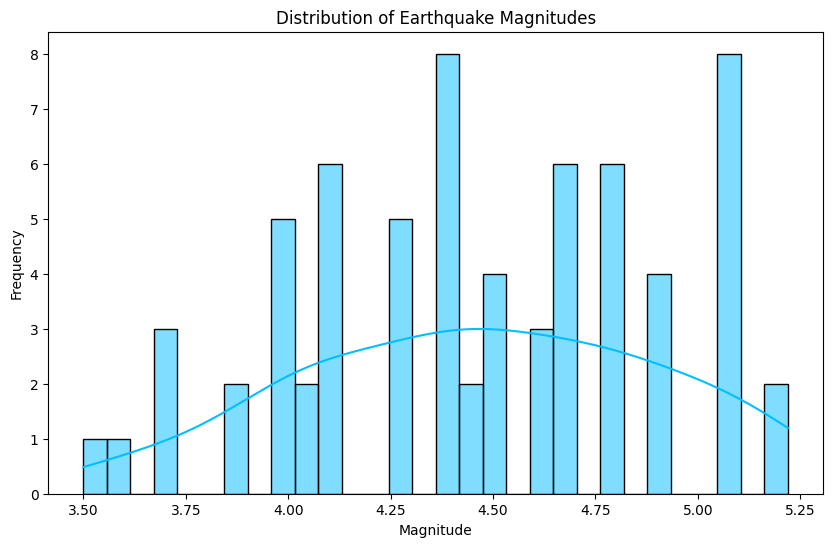

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['magnitude'], bins=30, kde=True, color='#00BFFF')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()


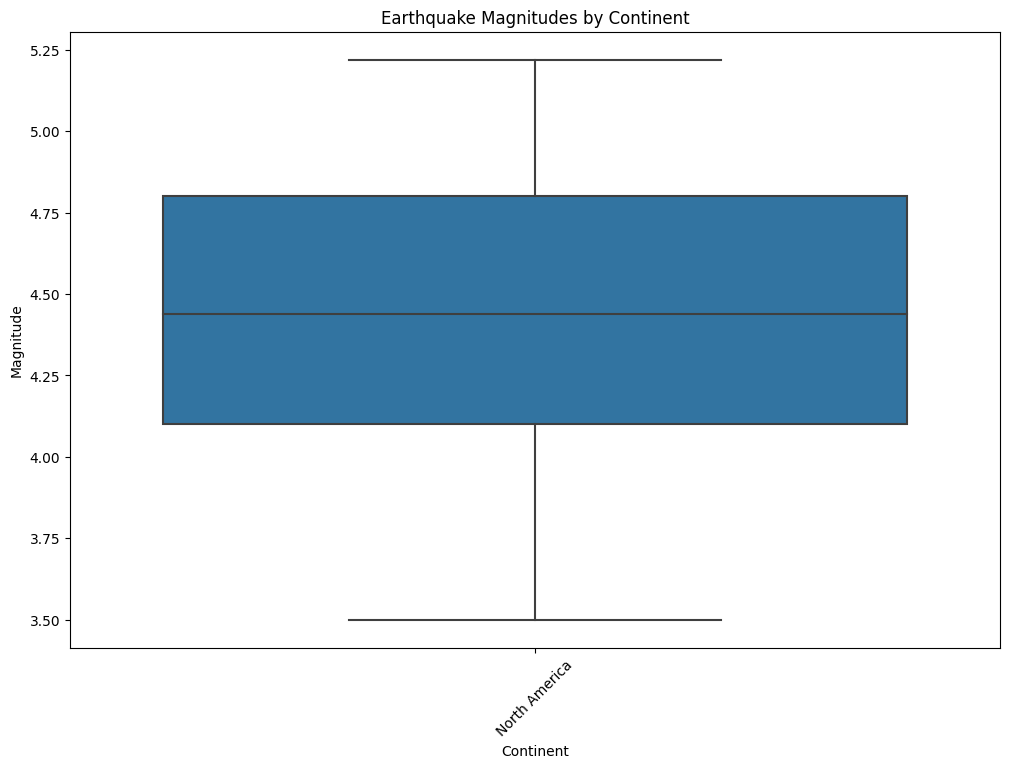

In [6]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='continent', y='magnitude', data=cleaned_df)
plt.title('Earthquake Magnitudes by Continent')
plt.xlabel('Continent')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)
plt.show()


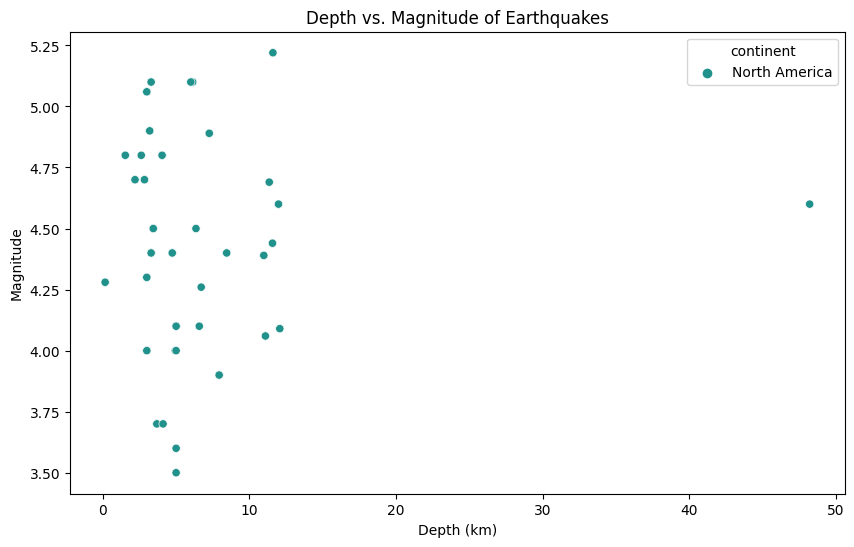

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='depth', y='magnitude', hue='continent', data=cleaned_df, palette='viridis')
plt.title('Depth vs. Magnitude of Earthquakes')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()


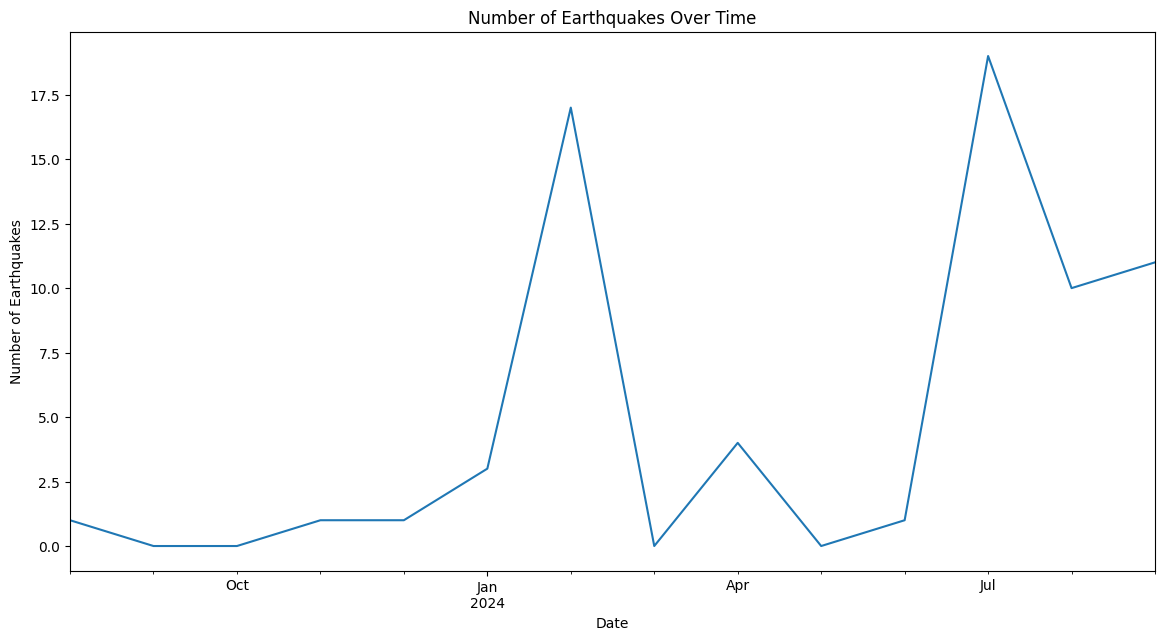

In [8]:
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])
earthquakes_over_time = cleaned_df.set_index('date').resample('M').size()

plt.figure(figsize=(14, 7))
earthquakes_over_time.plot()
plt.title('Number of Earthquakes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Earthquakes')
plt.show()


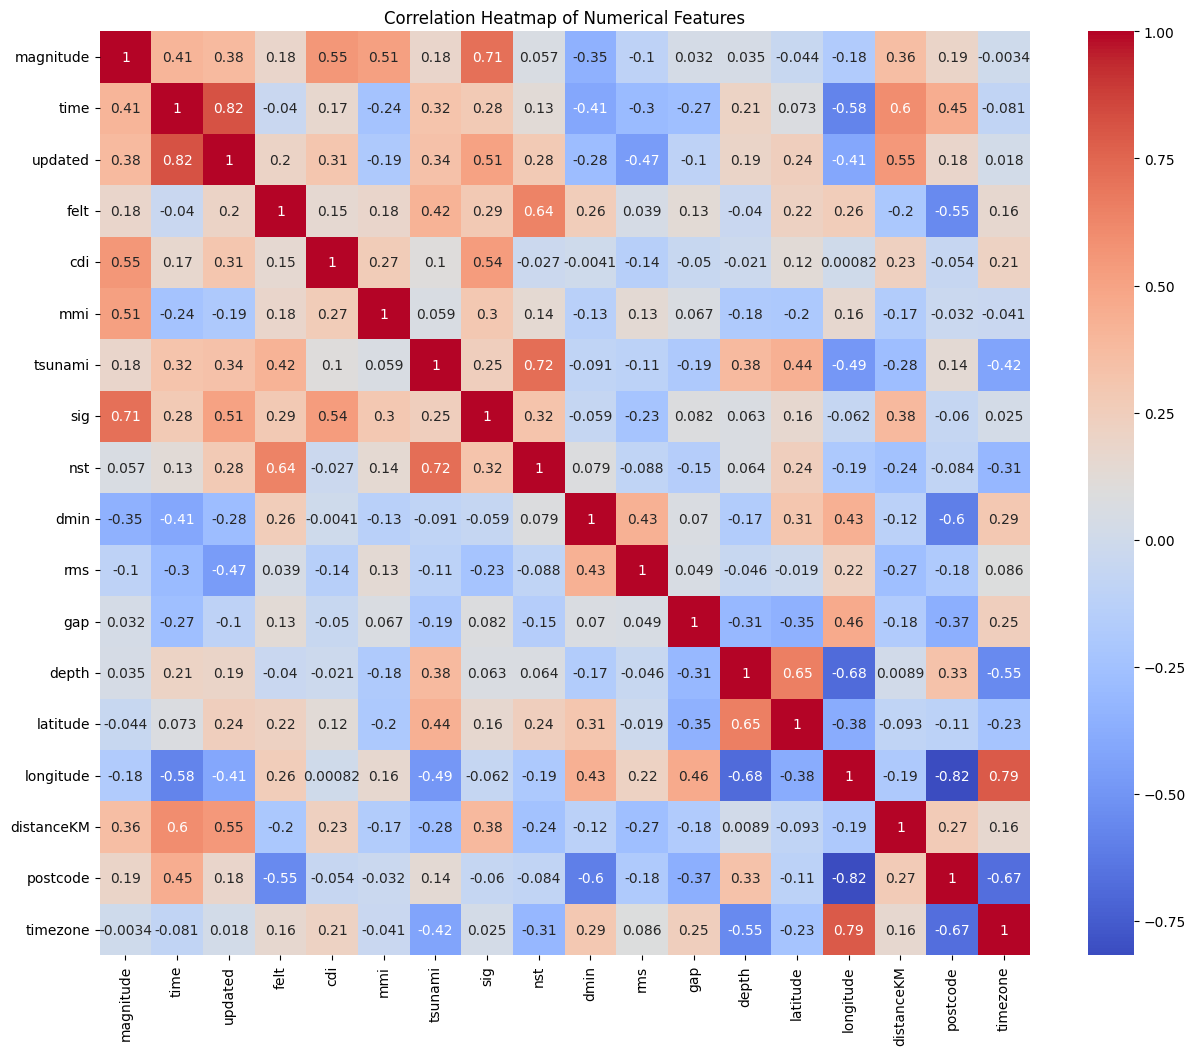

In [9]:
plt.figure(figsize=(15, 12))
sns.heatmap(cleaned_df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


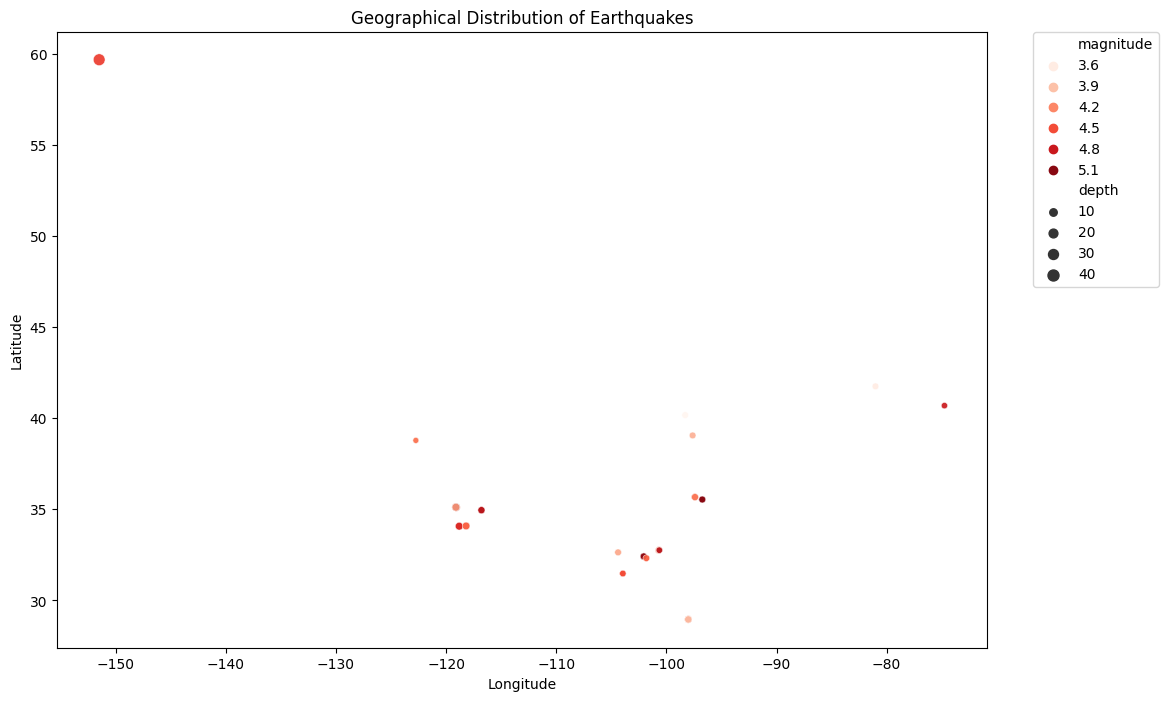

In [10]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='magnitude', size='depth', data=cleaned_df, palette='Reds', alpha=0.9)
plt.title('Geographical Distribution of Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


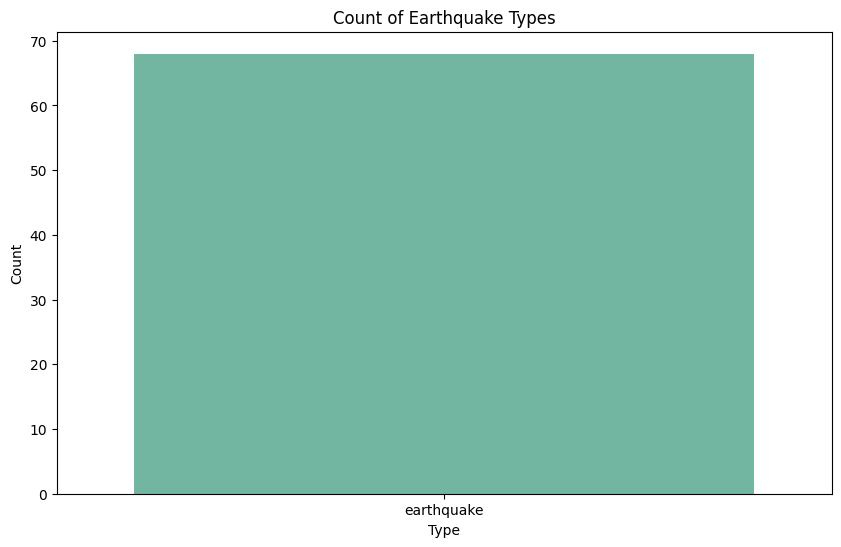

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=cleaned_df, palette='Set2')
plt.title('Count of Earthquake Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


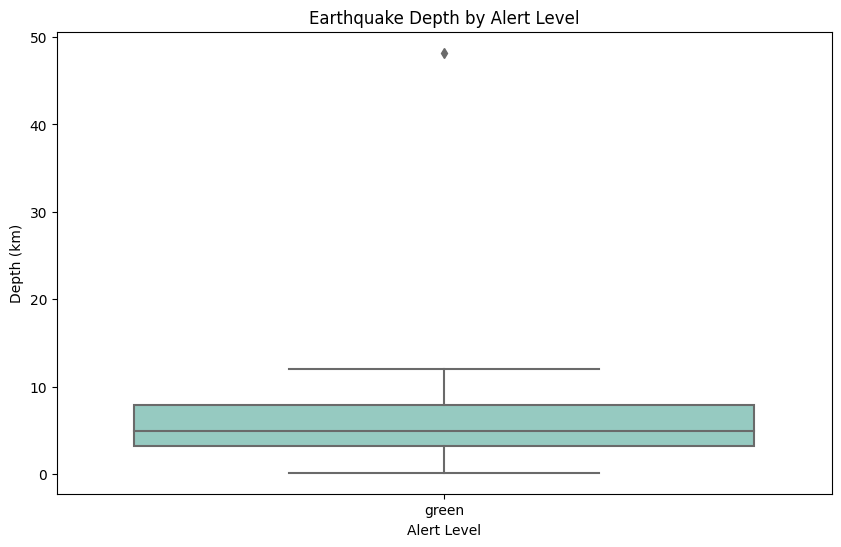

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='alert', y='depth', data=cleaned_df, palette='Set3')
plt.title('Earthquake Depth by Alert Level')
plt.xlabel('Alert Level')
plt.ylabel('Depth (km)')
plt.show()


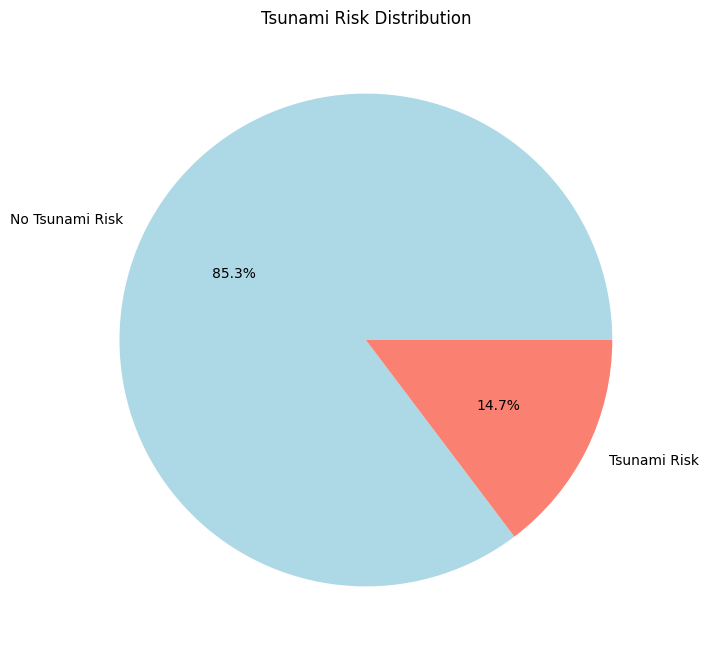

In [13]:
tsunami_counts = cleaned_df['tsunami'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(tsunami_counts, labels=['No Tsunami Risk', 'Tsunami Risk'], autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('Tsunami Risk Distribution')
plt.show()


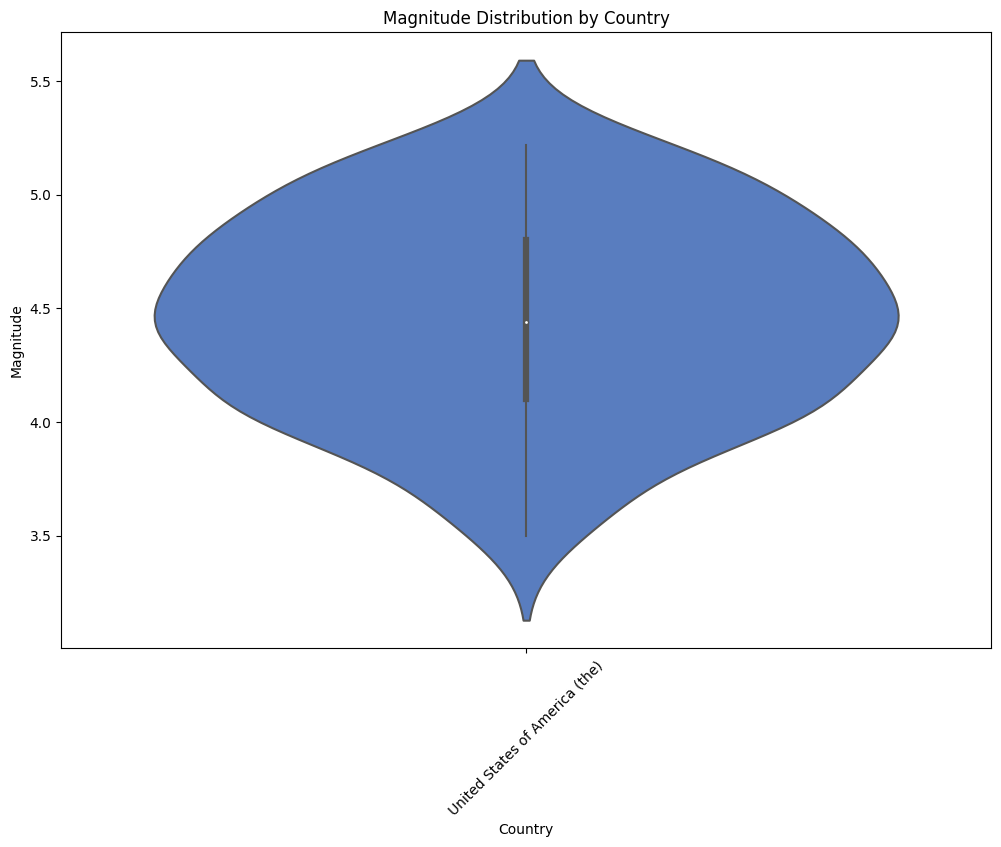

In [14]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='country', y='magnitude', data=cleaned_df, palette='muted')
plt.title('Magnitude Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)
plt.show()


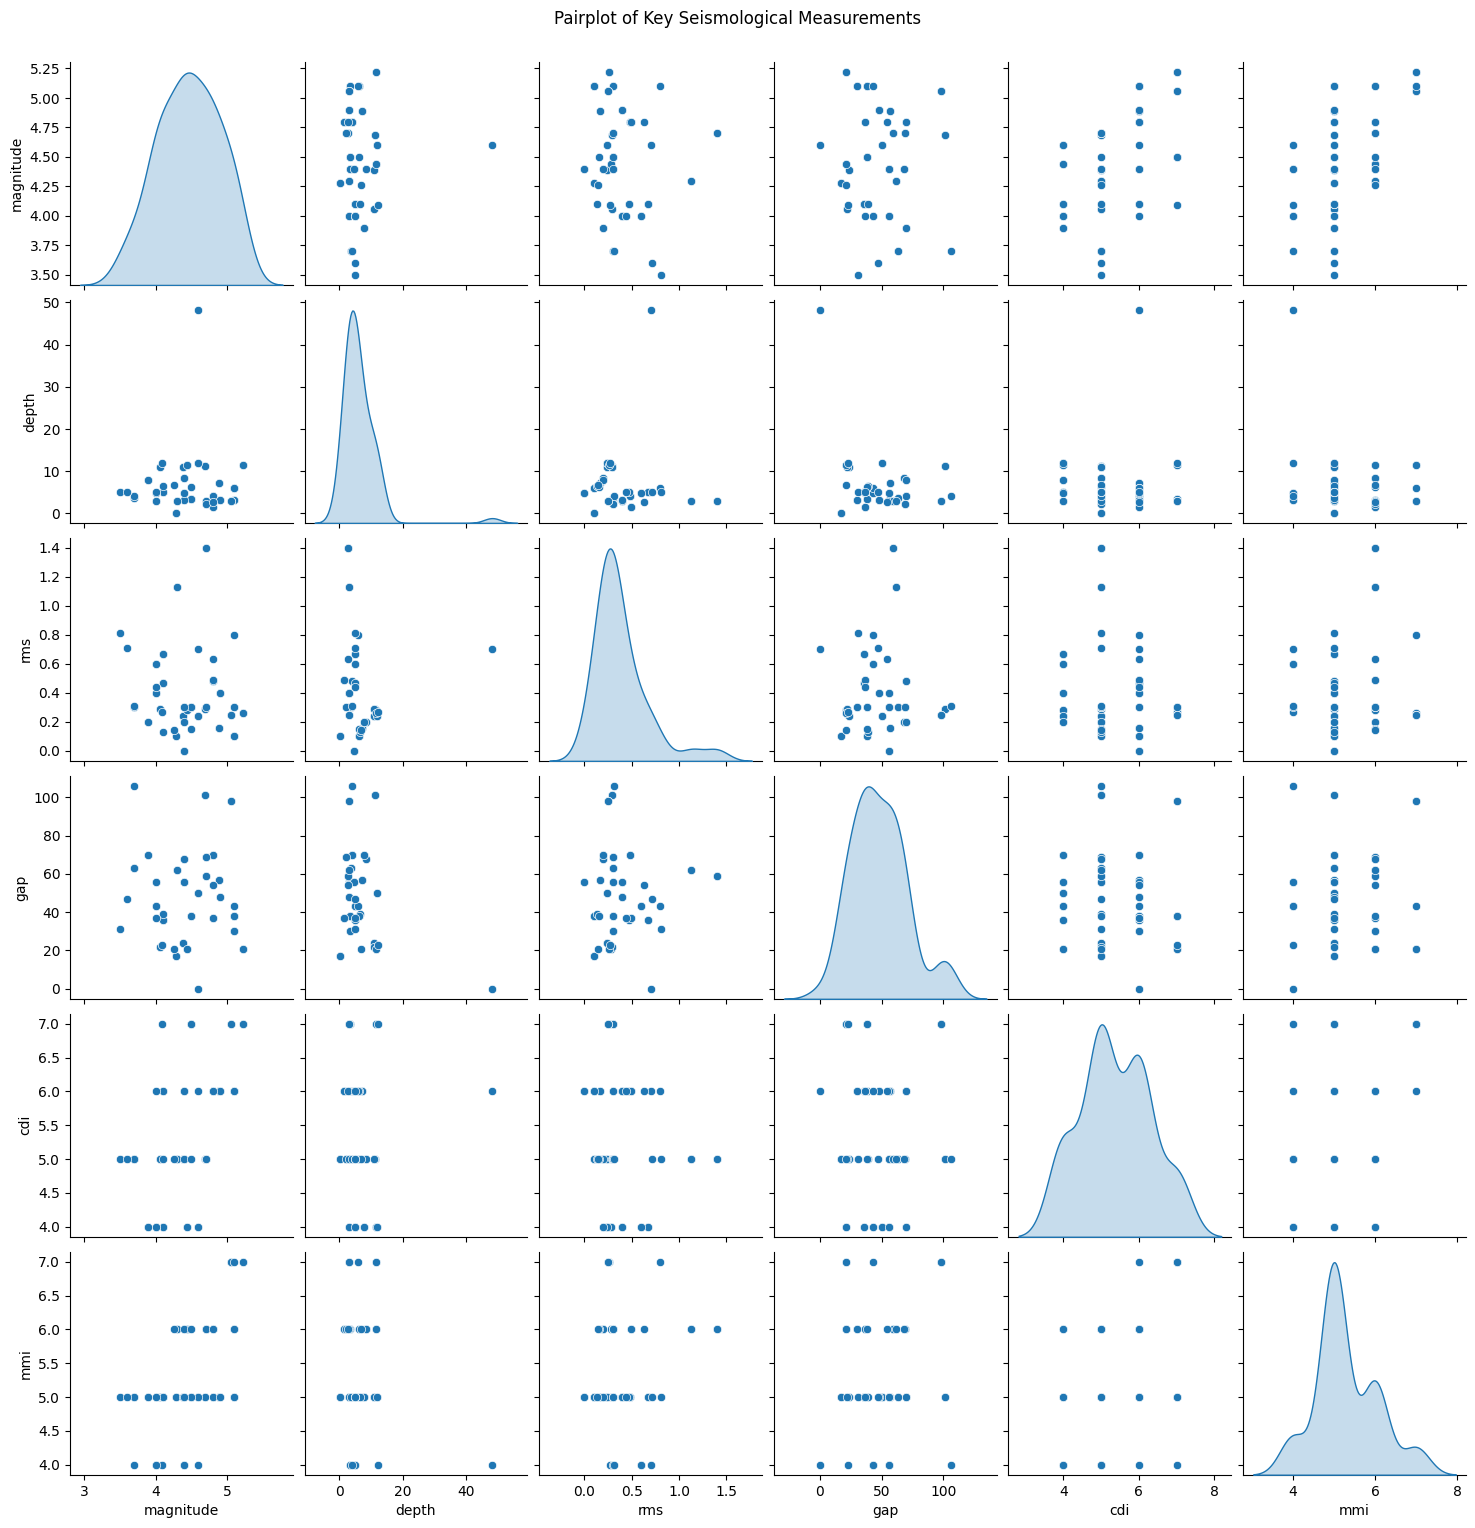

()

In [15]:
sns.pairplot(cleaned_df[['magnitude', 'depth', 'rms', 'gap', 'cdi', 'mmi']], diag_kind='kde')
plt.suptitle('Pairplot of Key Seismological Measurements', y=1.02)
plt.show()
/

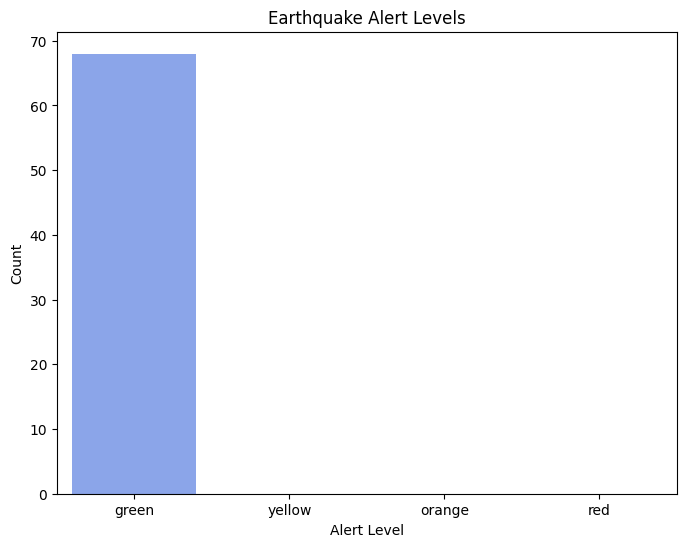

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='alert', data=cleaned_df, order=['green', 'yellow', 'orange', 'red'], palette='coolwarm')
plt.title('Earthquake Alert Levels')
plt.xlabel('Alert Level')
plt.ylabel('Count')
plt.show()


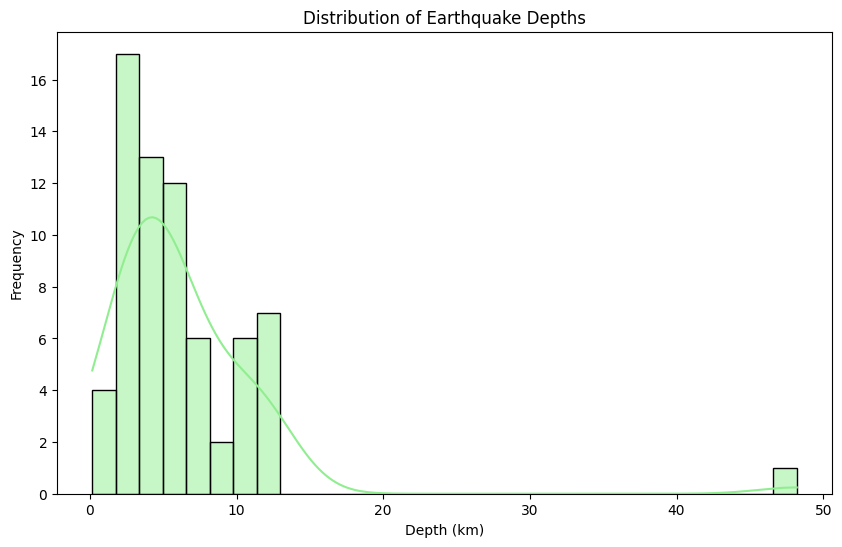

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['depth'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Earthquake Depths')
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')
plt.show()


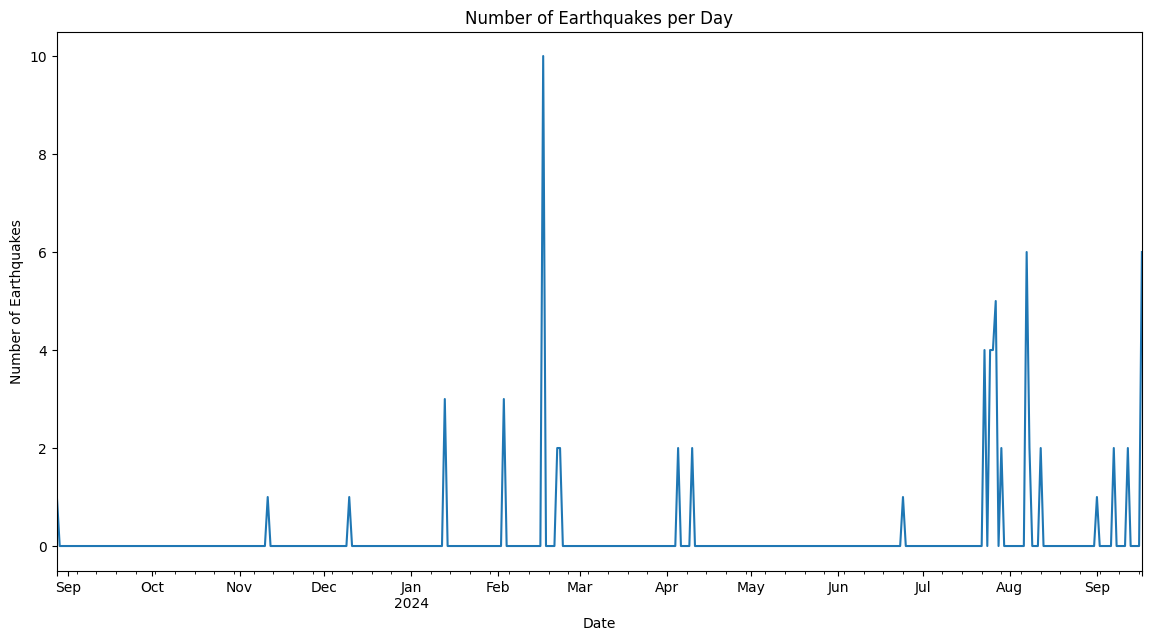

In [18]:
earthquakes_per_day = cleaned_df.set_index('date').resample('D').size()

plt.figure(figsize=(14, 7))
earthquakes_per_day.plot()
plt.title('Number of Earthquakes per Day')
plt.xlabel('Date')
plt.ylabel('Number of Earthquakes')
plt.show()


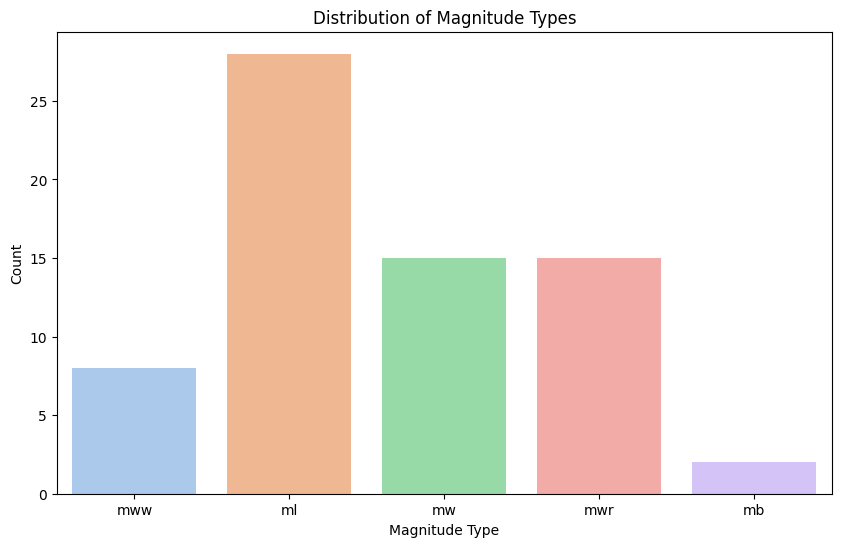

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='magType', data=cleaned_df, palette='pastel')
plt.title('Distribution of Magnitude Types')
plt.xlabel('Magnitude Type')
plt.ylabel('Count')
plt.show()


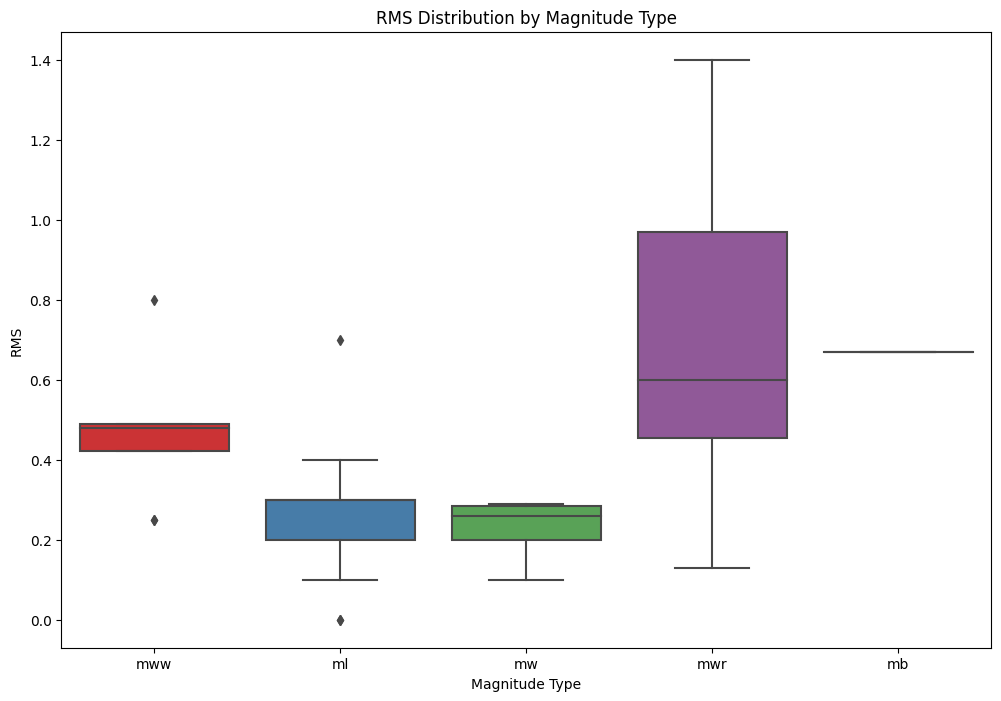

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='magType', y='rms', data=cleaned_df, palette='Set1')
plt.title('RMS Distribution by Magnitude Type')
plt.xlabel('Magnitude Type')
plt.ylabel('RMS')
plt.show()


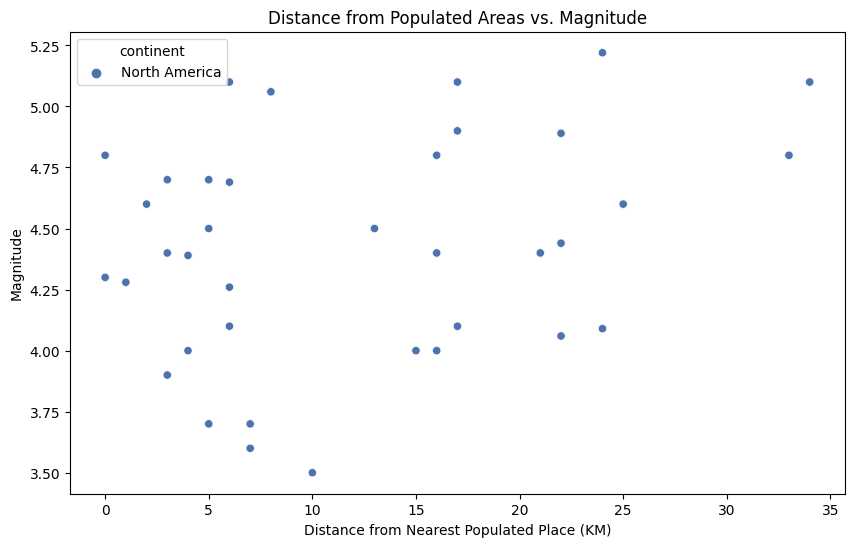

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distanceKM', y='magnitude', hue='continent', data=cleaned_df, palette='deep')
plt.title('Distance from Populated Areas vs. Magnitude')
plt.xlabel('Distance from Nearest Populated Place (KM)')
plt.ylabel('Magnitude')
plt.show()


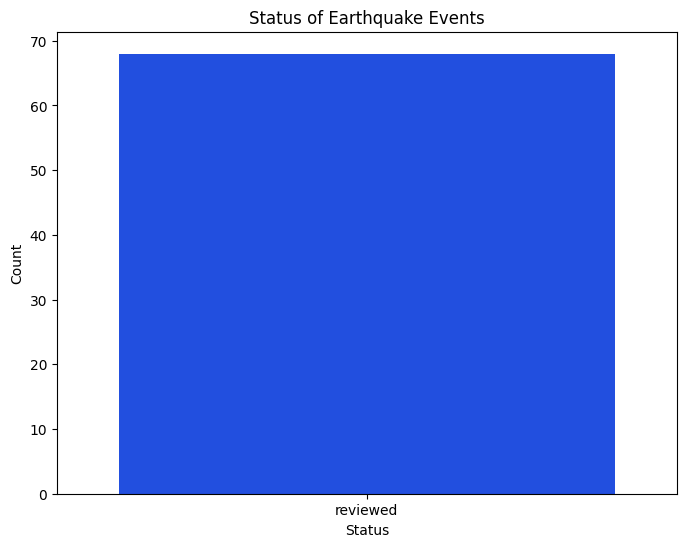

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=cleaned_df, palette='bright')
plt.title('Status of Earthquake Events')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


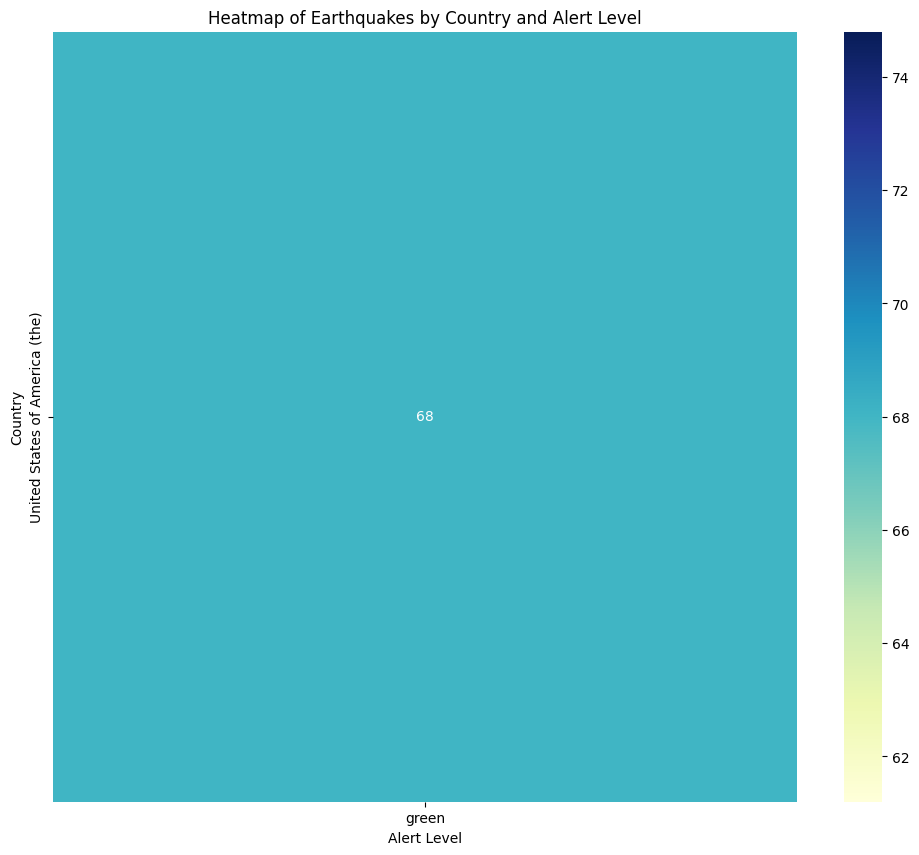

In [23]:
heatmap_data = cleaned_df.pivot_table(index='country', columns='alert', values='id', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Earthquakes by Country and Alert Level')
plt.xlabel('Alert Level')
plt.ylabel('Country')
plt.show()


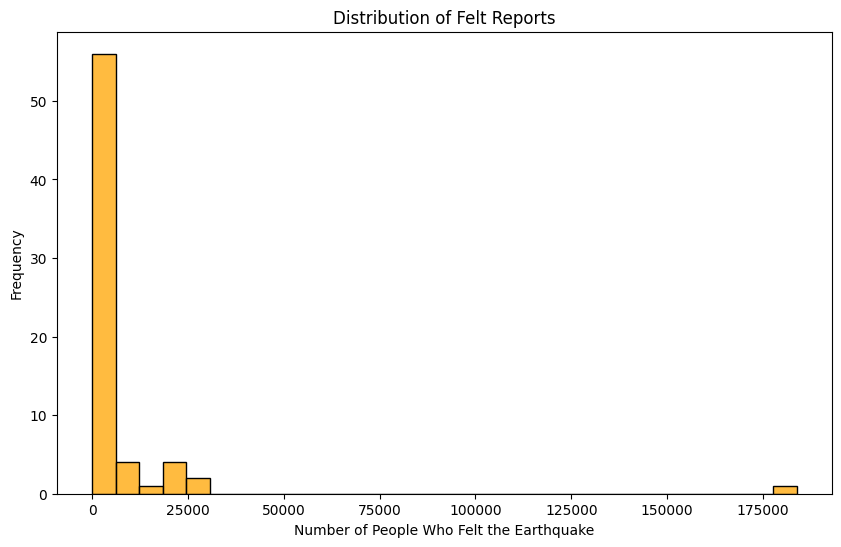

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['felt'], bins=30, kde=False, color='orange')
plt.title('Distribution of Felt Reports')
plt.xlabel('Number of People Who Felt the Earthquake')
plt.ylabel('Frequency')
plt.show()


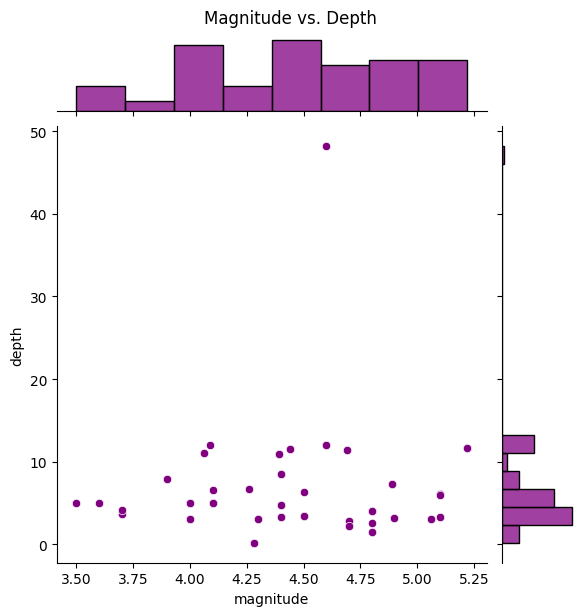

In [25]:
sns.jointplot(x='magnitude', y='depth', data=cleaned_df, kind='scatter', color='purple')
plt.suptitle('Magnitude vs. Depth', y=1.02)
plt.show()


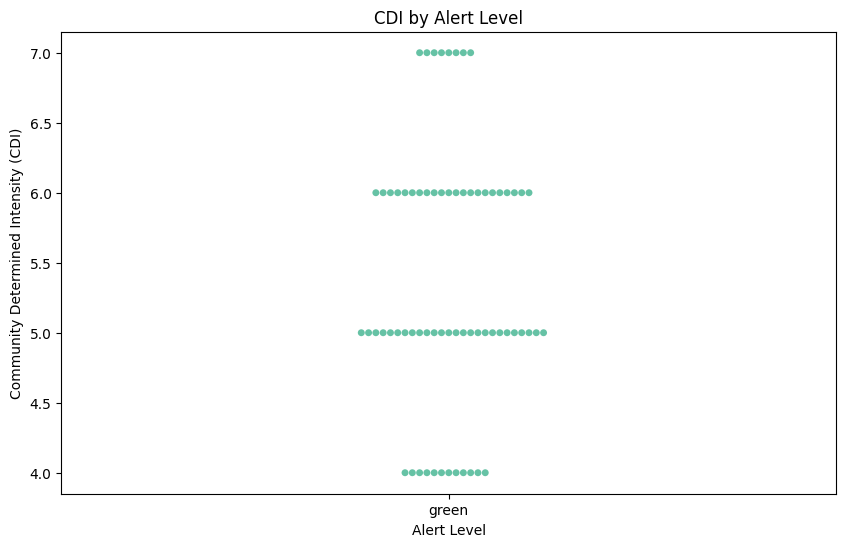

In [26]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='alert', y='cdi', data=cleaned_df, palette='Set2')
plt.title('CDI by Alert Level')
plt.xlabel('Alert Level')
plt.ylabel('Community Determined Intensity (CDI)')
plt.show()


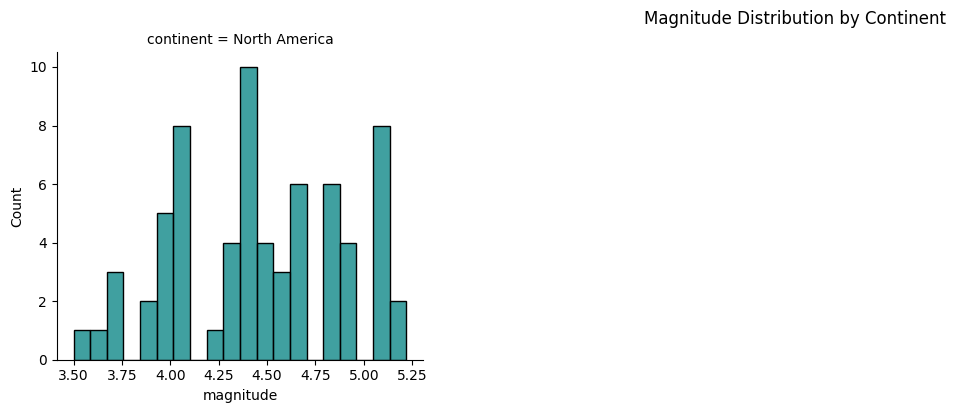

In [27]:
g = sns.FacetGrid(cleaned_df, col='continent', col_wrap=4, height=4)
g.map(sns.histplot, 'magnitude', bins=20, color='teal')
g.fig.suptitle('Magnitude Distribution by Continent', y=1.02)
plt.show()


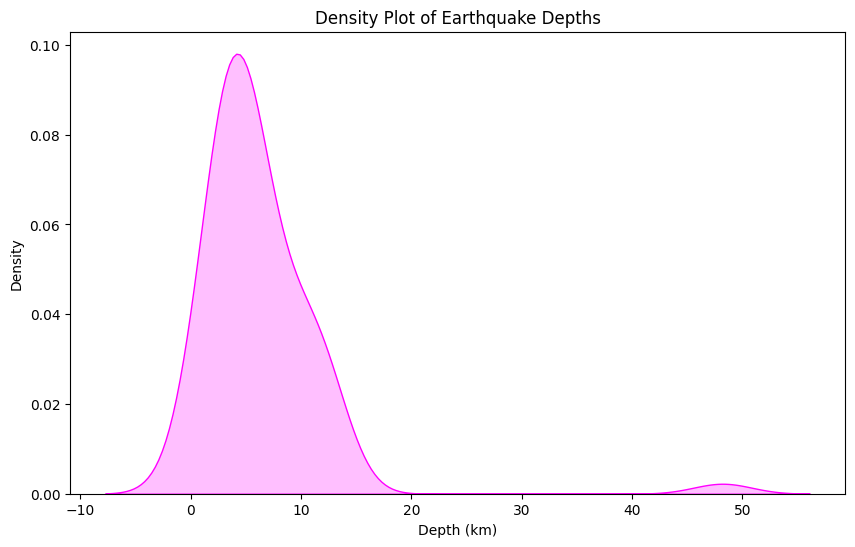

In [28]:
plt.figure(figsize=(10, 6))
sns.kdeplot(cleaned_df['depth'], shade=True, color='magenta')
plt.title('Density Plot of Earthquake Depths')
plt.xlabel('Depth (km)')
plt.ylabel('Density')
plt.show()


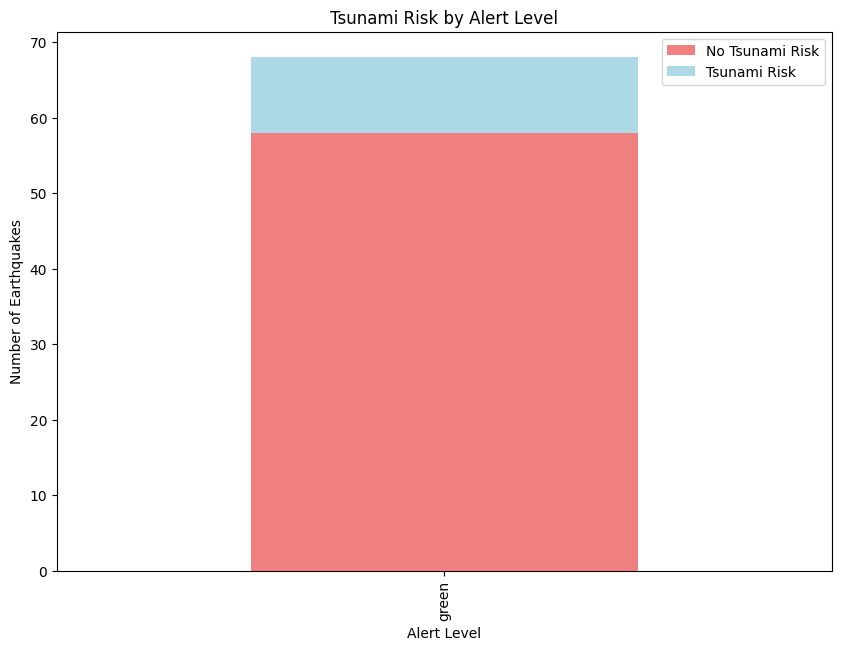

In [29]:
tsunami_alert = cleaned_df.groupby(['alert', 'tsunami']).size().unstack(fill_value=0)

tsunami_alert.plot(kind='bar', stacked=True, figsize=(10, 7), color=['lightcoral', 'lightblue'])
plt.title('Tsunami Risk by Alert Level')
plt.xlabel('Alert Level')
plt.ylabel('Number of Earthquakes')
plt.legend(['No Tsunami Risk', 'Tsunami Risk'])
plt.show()


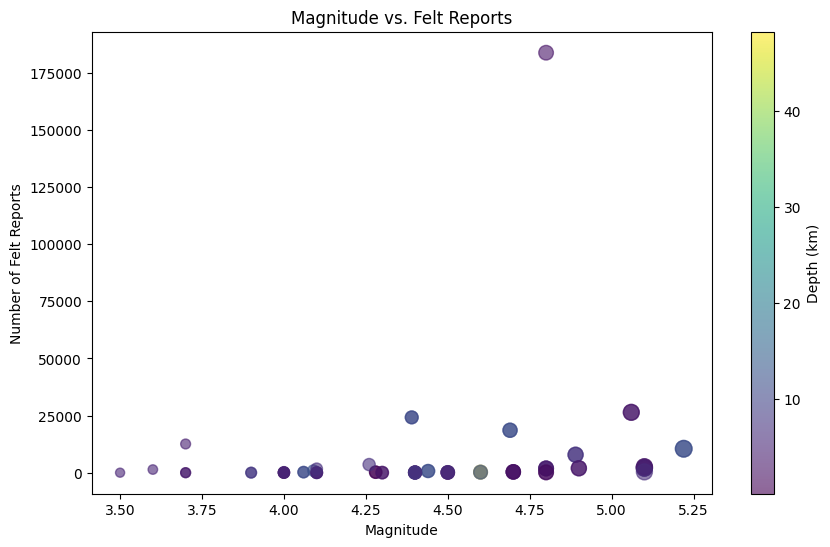

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['magnitude'], cleaned_df['felt'], alpha=0.6, s=cleaned_df['magnitude']**3, c=cleaned_df['depth'], cmap='viridis')
plt.colorbar(label='Depth (km)')
plt.title('Magnitude vs. Felt Reports')
plt.xlabel('Magnitude')
plt.ylabel('Number of Felt Reports')
plt.show()


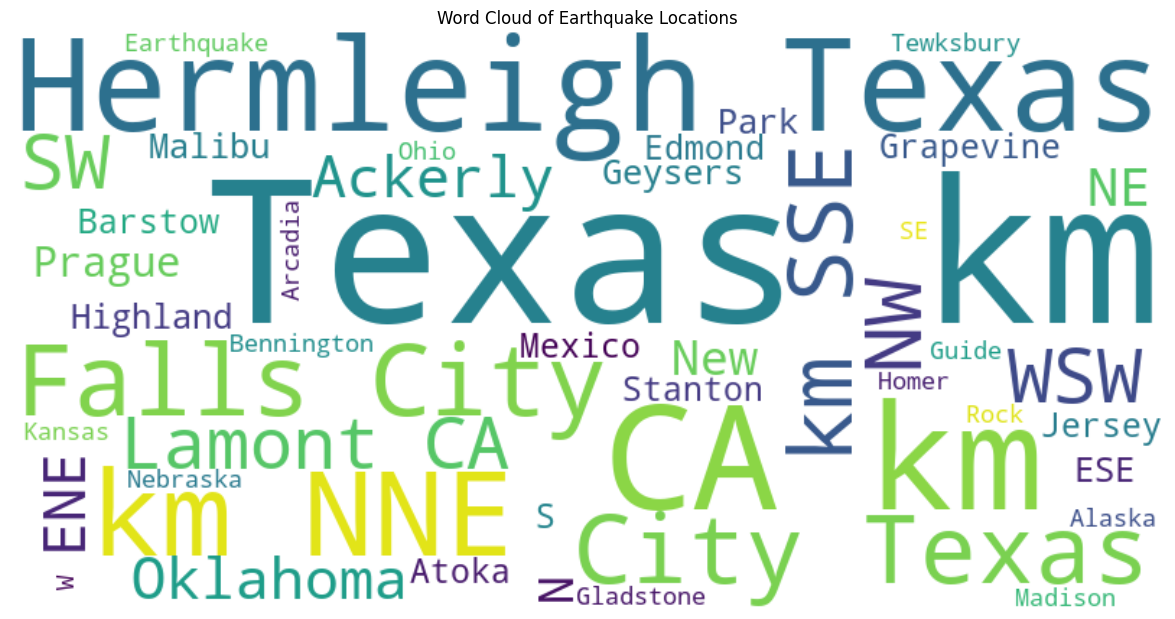

In [31]:
text = ' '.join(cleaned_df['place'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Earthquake Locations')
plt.show()


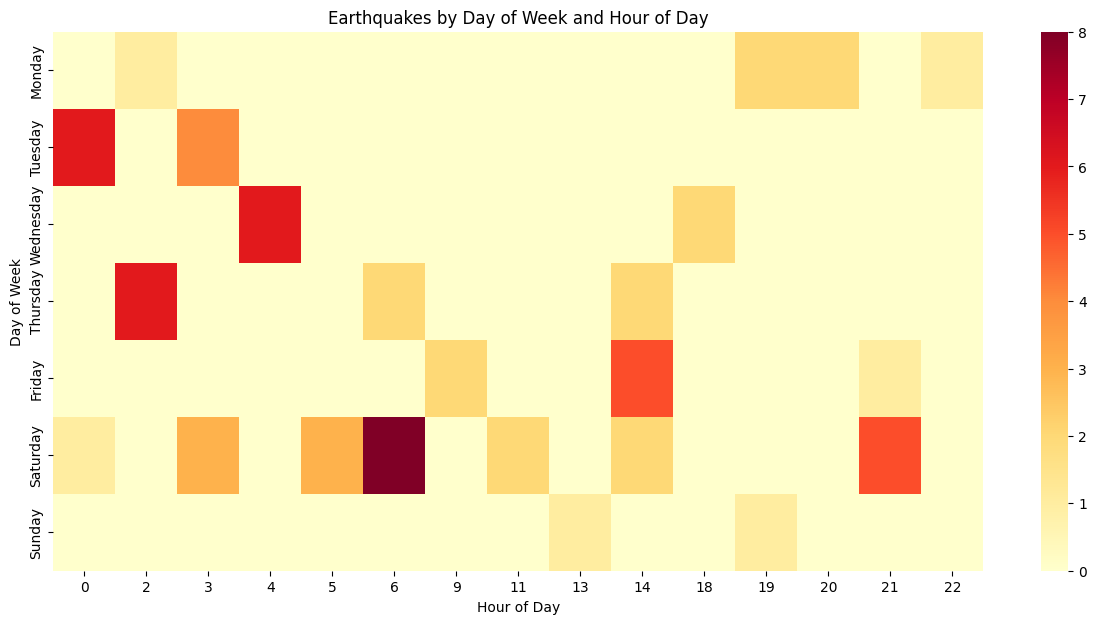

In [32]:
cleaned_df['day_of_week'] = cleaned_df['date'].dt.day_name()
cleaned_df['hour'] = cleaned_df['date'].dt.hour
heatmap_data = cleaned_df.pivot_table(index='day_of_week', columns='hour', values='id', aggfunc='count', fill_value=0)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

plt.figure(figsize=(15, 7))
sns.heatmap(heatmap_data, cmap='YlOrRd')
plt.title('Earthquakes by Day of Week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


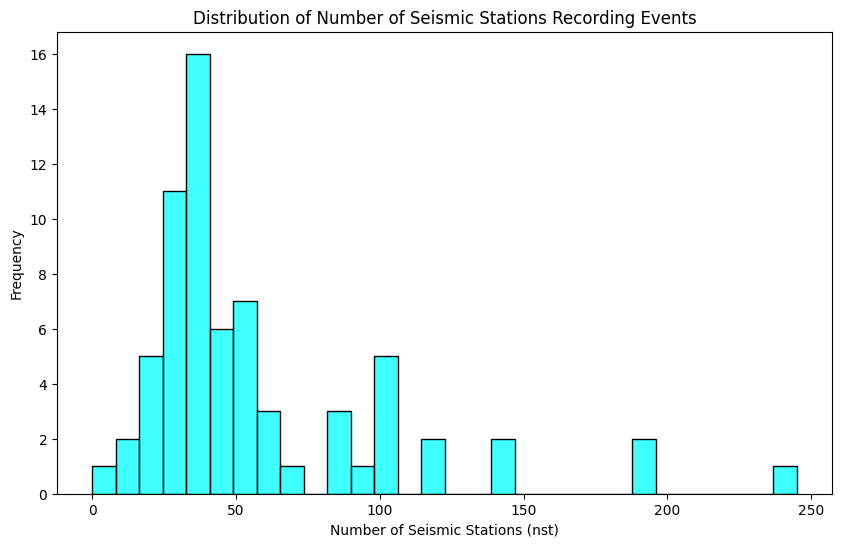

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['nst'], bins=30, kde=False, color='cyan')
plt.title('Distribution of Number of Seismic Stations Recording Events')
plt.xlabel('Number of Seismic Stations (nst)')
plt.ylabel('Frequency')
plt.show()


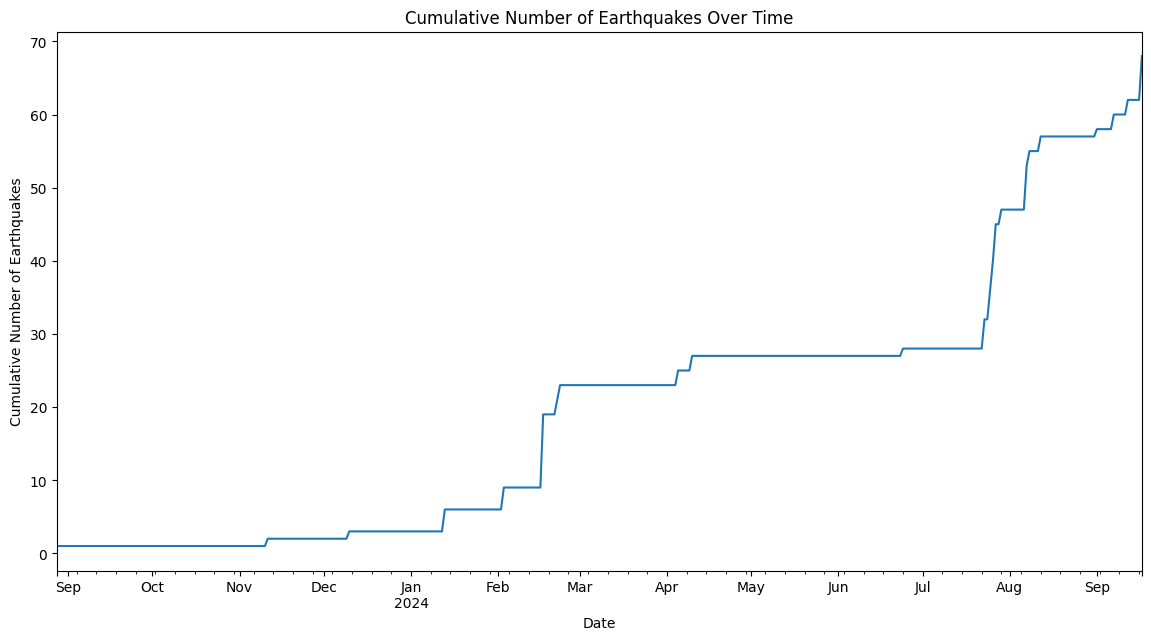

In [34]:
cumulative_eq = cleaned_df.set_index('date').resample('D').size().cumsum()

plt.figure(figsize=(14, 7))
cumulative_eq.plot()
plt.title('Cumulative Number of Earthquakes Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Number of Earthquakes')
plt.show()


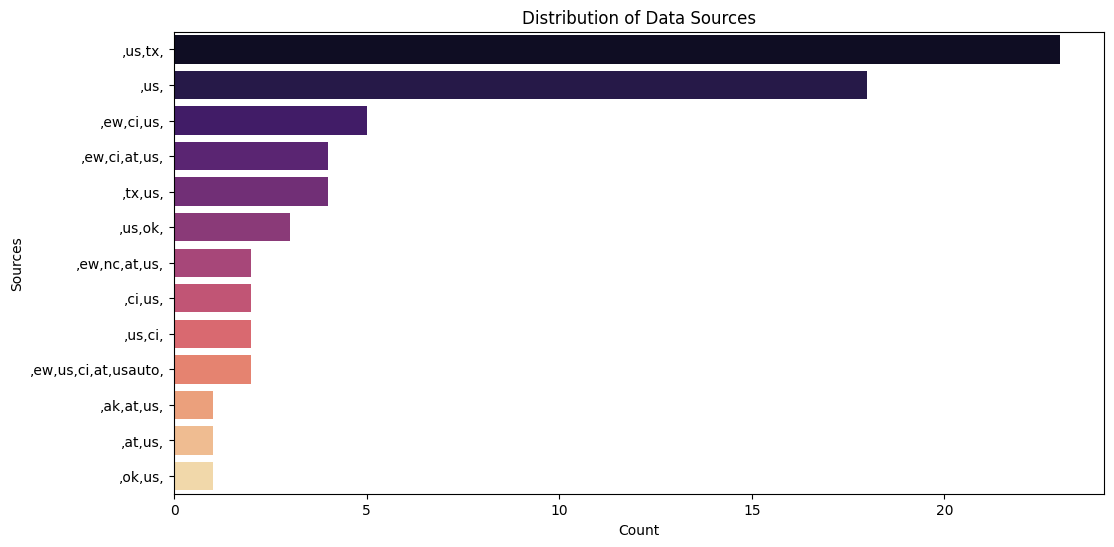

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(y='sources', data=cleaned_df, order=cleaned_df['sources'].value_counts().index, palette='magma')
plt.title('Distribution of Data Sources')
plt.xlabel('Count')
plt.ylabel('Sources')
plt.show()


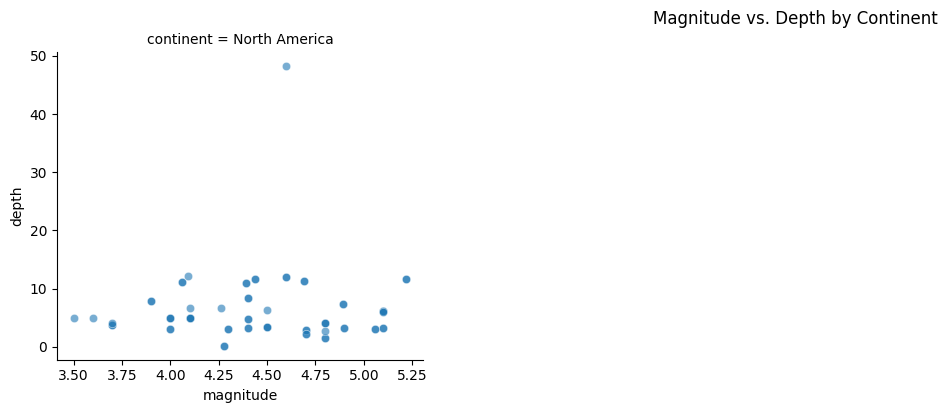

In [36]:
g = sns.FacetGrid(cleaned_df, col='continent', col_wrap=4, height=4)
g.map(sns.scatterplot, 'magnitude', 'depth', alpha=0.6)
g.fig.suptitle('Magnitude vs. Depth by Continent', y=1.02)
plt.show()


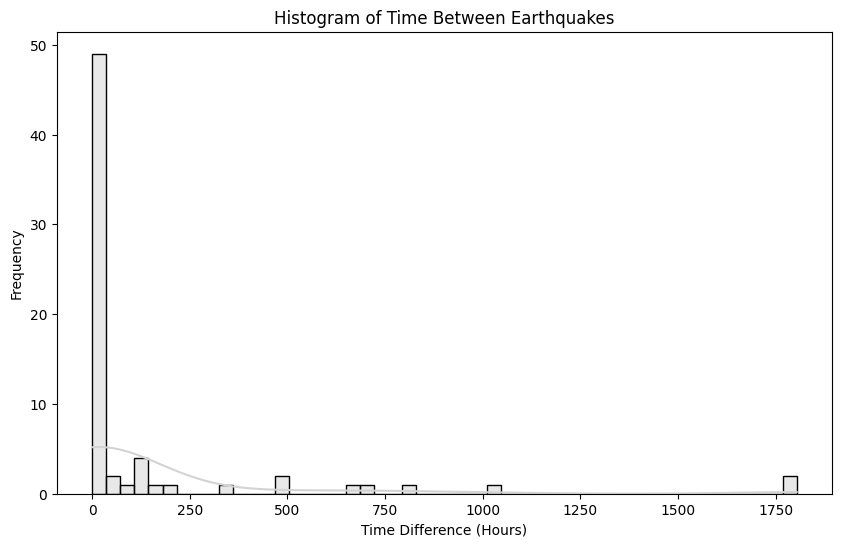

In [37]:
cleaned_df = cleaned_df.sort_values('date')
cleaned_df['time_diff'] = cleaned_df['date'].diff().dt.total_seconds().div(3600)

plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['time_diff'].dropna(), bins=50, kde=True, color='lightgrey')
plt.title('Histogram of Time Between Earthquakes')
plt.xlabel('Time Difference (Hours)')
plt.ylabel('Frequency')
plt.show()


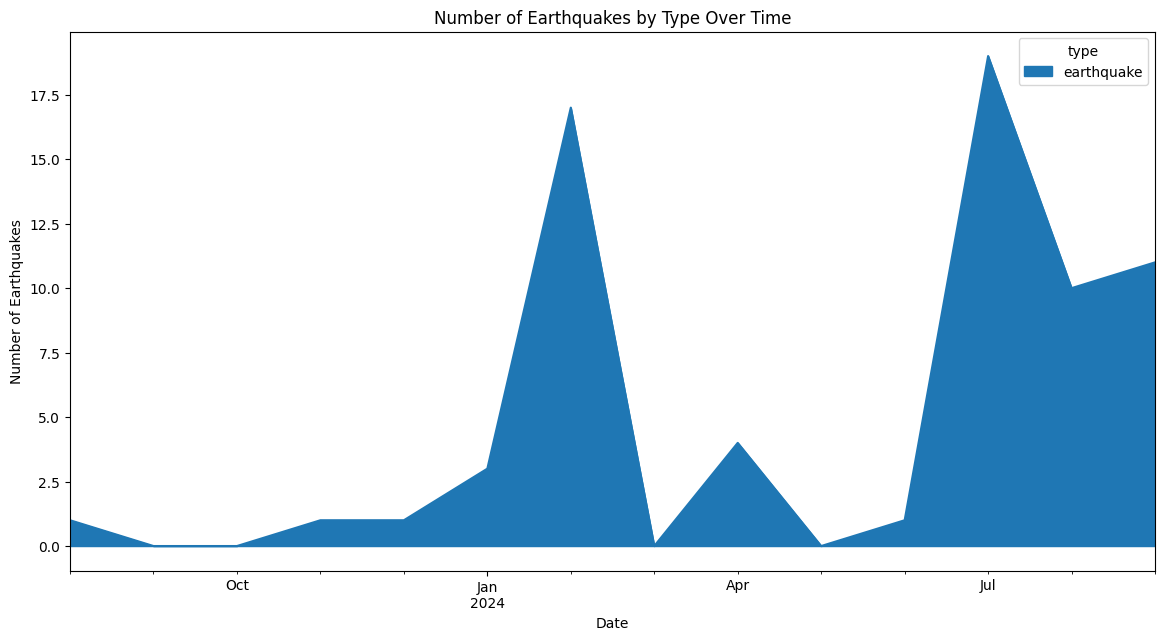

In [38]:
eq_types_over_time = cleaned_df.set_index('date').groupby(['type']).resample('M').size().unstack(level=0).fillna(0)

eq_types_over_time.plot(kind='area', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('Number of Earthquakes by Type Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Earthquakes')
plt.show()


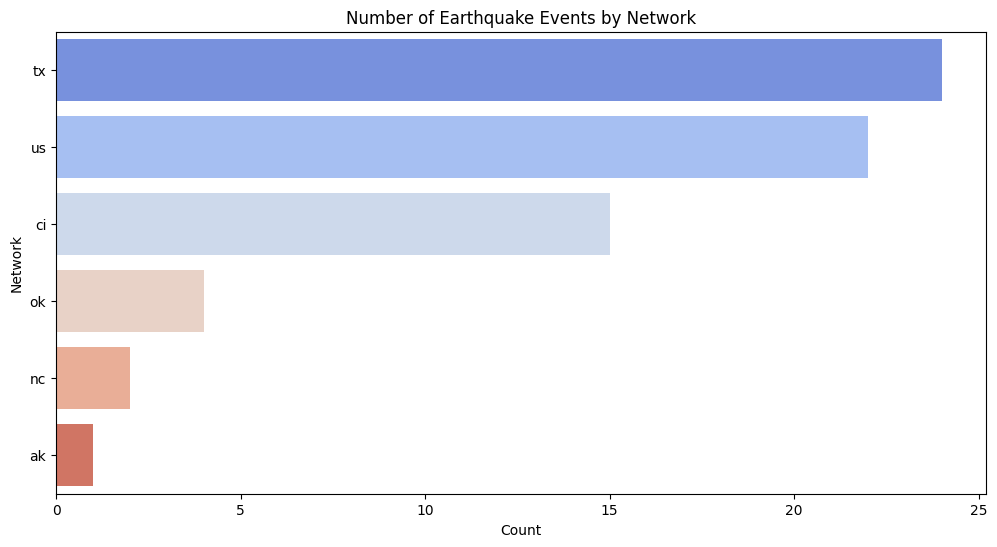

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(y='net', data=cleaned_df, order=cleaned_df['net'].value_counts().index, palette='coolwarm')
plt.title('Number of Earthquake Events by Network')
plt.xlabel('Count')
plt.ylabel('Network')
plt.show()


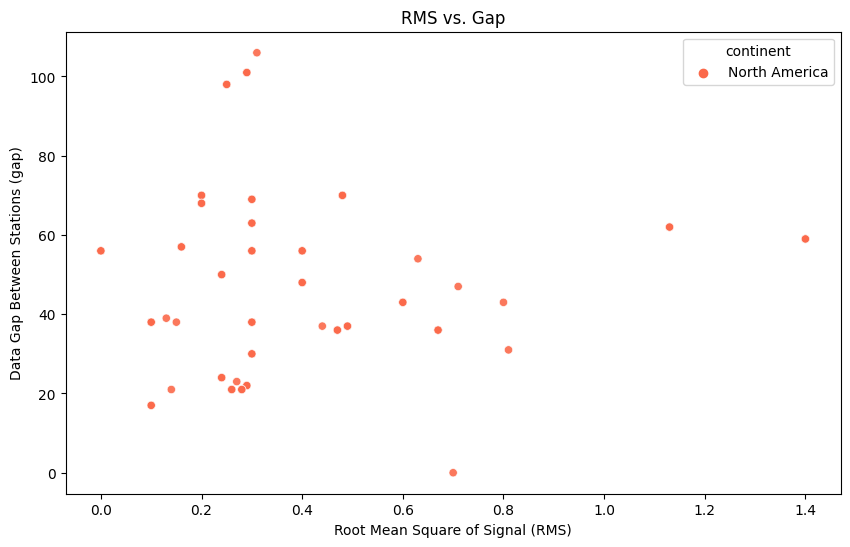

In [40]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='rms', y='gap', hue='continent', data=cleaned_df, palette='Reds', alpha=0.9)
plt.title('RMS vs. Gap')
plt.xlabel('Root Mean Square of Signal (RMS)')
plt.ylabel('Data Gap Between Stations (gap)')
plt.show()

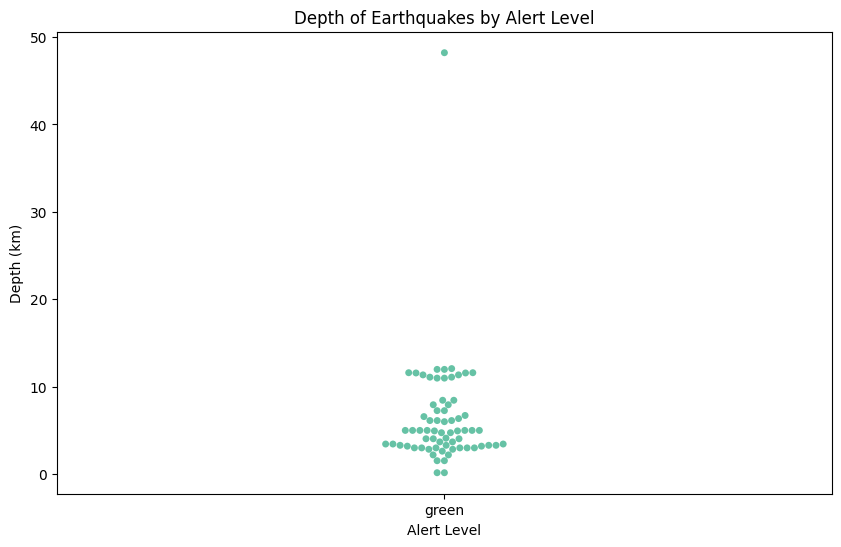

In [41]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='alert', y='depth', data=cleaned_df, palette='Set2',color='#00BFFF')
plt.title('Depth of Earthquakes by Alert Level')
plt.xlabel('Alert Level')
plt.ylabel('Depth (km)')
plt.show()


In [42]:
fig = px.scatter_geo(
    cleaned_df,
    lat='latitude',
    lon='longitude',
    color='depth',
    size='magnitude',
    hover_name='place',
    hover_data={
        'magnitude': True,
        'depth': True,
        'date': True,
        'country': True
    },
    color_continuous_scale='Viridis',
    projection='natural earth',
    title='Global Earthquake Distribution',
    size_max=15
)

fig.update_layout(
    legend_title='Depth (km)',
    geo=dict(
        showland=True,
        landcolor='rgb(217, 217, 217)',
        showcountries=True,
    )
)

fig.show()


The map displays global earthquake distribution with points colored by depth and sized by magnitude. You can pan around the map and click on dots to get more information about each earthquake. Hovering over a dot reveals details such as magnitude, depth, date, and location